In [1]:
import requests
#import holoviews as hv
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
#pd.options.plotting.backend = 'holoviews'
%matplotlib inline

In [2]:
def get_multiple_crypto_data(crypto_one="BTC-USD", crypto_two="ETH-USD", date1 = '01-01-2020', date2 = '03-31-2020'):
    
    # Crypto one
    api_str = f'https://api.pro.coinbase.com/products/{crypto_one}/candles?start="{date1}"&end="{date2}"&granularity=86400'
    
    response = requests.get(api_str)
    
    df = pd.DataFrame(response.json())
    df = df.iloc[:,[0,4]]
    
    df.columns = ["date", "close"]
    df["date"] = pd.to_datetime(df["date"], unit='s')
    df.set_index("date", inplace=True)
    df = df.sort_index()
    
    # End Crypto one
    
    # Crypto two
    
    api_str = f'https://api.pro.coinbase.com/products/{crypto_two}/candles?start="{date1}"&end="{date2}"&granularity=86400'
    
    response = requests.get(api_str)
    
    df2 = pd.DataFrame(response.json())
    df2 = df2.iloc[:,[0,4]]
    
    df2.columns = ["date", "close"]
    df2["date"] = pd.to_datetime(df2["date"], unit='s')
    df2.set_index("date", inplace=True)
    df2 = df2.sort_index()
    
    df = pd.concat([df, df2], axis="columns", join="inner")
    
    return df

In [3]:
get_multiple_crypto_data()

,close,close
date,,
2020-01-01,7174.33,130.19
2020-01-02,6945.02,126.81
2020-01-03,7334.45,134.17
2020-01-04,7348.63,134.14
2020-01-05,7355.40,135.31
...,...,...
2020-03-27,6372.36,131.56
2020-03-28,6251.82,131.35
2020-03-29,5877.21,124.35


In [4]:
get_multiple_crypto_data(date1="04/01/2020", date2="07/31/2020")

,close,close
date,,
2020-04-01,6666.11,136.14
2020-04-02,6804.52,141.53
2020-04-03,6741.99,141.54
2020-04-04,6874.77,144.48
2020-04-05,6778.25,142.79
...,...,...
2020-07-27,11048.91,322.24
2020-07-28,10934.23,317.59
2020-07-29,11110.12,318.16


In [5]:
all_data = pd.concat(
    [
        get_multiple_crypto_data(),
        get_multiple_crypto_data(date1="04/01/2020", date2="06/30/2020"),
        get_multiple_crypto_data(date1="07/01/2020", date2="09/30/2020"),
        get_multiple_crypto_data(date1="10/01/2020", date2="012/31/2020")
    ], axis="rows")

In [6]:
all_data.head()

,close,close
date,,
2020-01-01,7174.33,130.19
2020-01-02,6945.02,126.81
2020-01-03,7334.45,134.17
2020-01-04,7348.63,134.14
2020-01-05,7355.40,135.31


In [7]:
gov_spending20_csv = Path("Gov_Spending.csv")
gov_spending20 = pd.read_csv(gov_spending20_csv)
gov_spending20.head()

,Record Date,Parent ID,Classification ID,Classification Description,Current Month Gross Receipts Amount,Current Month Gross Outlay Amount,Current Month Deficit Surplus Amount
0,12/31/20,NaN,44802184.0,FY 2020,null,null,null
1,12/31/20,44802184.0,44802187.0,October,"$245,520,982,120.90","$379,988,361,130.71","$134,467,379,009.81"
2,12/31/20,44802184.0,44802189.0,November,"$225,185,415,497.28","$434,023,709,954.02","$208,838,294,456.74"
3,12/31/20,44802184.0,44802191.0,December,"$335,805,401,484.89","$349,091,277,973.68","$13,285,876,488.79"
4,12/31/20,44802184.0,44802193.0,January,"$372,287,913,768.70","$404,882,870,789.11","$32,594,957,020.41"


In [8]:
#gov_spending20 = gov_spending20.drop(labels=[0,13])

In [9]:
gov_spending20.head()

,Record Date,Parent ID,Classification ID,Classification Description,Current Month Gross Receipts Amount,Current Month Gross Outlay Amount,Current Month Deficit Surplus Amount
0,12/31/20,NaN,44802184.0,FY 2020,null,null,null
1,12/31/20,44802184.0,44802187.0,October,"$245,520,982,120.90","$379,988,361,130.71","$134,467,379,009.81"
2,12/31/20,44802184.0,44802189.0,November,"$225,185,415,497.28","$434,023,709,954.02","$208,838,294,456.74"
3,12/31/20,44802184.0,44802191.0,December,"$335,805,401,484.89","$349,091,277,973.68","$13,285,876,488.79"
4,12/31/20,44802184.0,44802193.0,January,"$372,287,913,768.70","$404,882,870,789.11","$32,594,957,020.41"


In [10]:
gov_spending20 = gov_spending20.iloc[:, [3, 5] ]

In [11]:
gov_spending20.dropna(inplace=True)

In [12]:
gov_spending20.iloc[1:13]

,Classification Description,Current Month Gross Outlay Amount
1,October,"$379,988,361,130.71"
2,November,"$434,023,709,954.02"
3,December,"$349,091,277,973.68"
4,January,"$404,882,870,789.11"
5,February,"$423,228,905,223.49"
6,March,"$355,754,063,237.51"
7,April,"$979,885,188,729.59"
8,May,"$572,614,424,728.25"
9,June,"$1,104,902,736,844.42"
10,July,"$626,487,389,535.23"


In [13]:
gov_spending20 = gov_spending20.replace('\$','',regex=True)


In [14]:
gov_spending20 = gov_spending20.replace('\,','',regex=True)

In [15]:
gov_spending20.head()

,Classification Description,Current Month Gross Outlay Amount
0,FY 2020,null
1,October,379988361130.71
2,November,434023709954.02
3,December,349091277973.68
4,January,404882870789.11


In [16]:
gov_spending20 = gov_spending20.iloc[1:13]

In [17]:
gov_spending20[' Current Month Gross Outlay Amount '
].astype(float)

1     3.799884e+11
2     4.340237e+11
3     3.490913e+11
4     4.048829e+11
5     4.232289e+11
6     3.557541e+11
7     9.798852e+11
8     5.726144e+11
9     1.104903e+12
10    6.264874e+11
11    4.232334e+11
12    4.977799e+11
Name:  Current Month Gross Outlay Amount , dtype: float64

In [18]:
gov_spending20.head()

,Classification Description,Current Month Gross Outlay Amount
1,October,379988361130.71
2,November,434023709954.02
3,December,349091277973.68
4,January,404882870789.11
5,February,423228905223.49


In [19]:
gov_spending20.columns = ["Date", "Gov_expense20"]

In [20]:
gov_spending20.set_index('Date')

,Gov_expense20
Date,
October,379988361130.71
November,434023709954.02
December,349091277973.68
January,404882870789.11
February,423228905223.49
March,355754063237.51
April,979885188729.59
May,572614424728.25
June,1104902736844.42


In [21]:
date20 = {3:"2020-01-31", 4:"2020-02-28", 5:"2020-03-30", 6:"2020-04-31", 7:"2020-05-30", 8:"2020-06-30", 9:"2020-07-31", 10:"2020-08-30", 
          11:"2020-09-30", 0:"2020-10-31", 1:"2020-11-30", 2:"2020-12-31"}

In [22]:
new_gov = gov_spending20.reset_index().rename(index=date20)
new_gov.index.names = ["Date"]
new_gov.drop(["Date"],axis=1,inplace=True)

In [23]:
new_gov

,index,Gov_expense20
Date,,
2020-10-31,1,379988361130.71
2020-11-30,2,434023709954.02
2020-12-31,3,349091277973.68
2020-01-31,4,404882870789.11
2020-02-28,5,423228905223.49
2020-03-30,6,355754063237.51
2020-04-31,7,979885188729.59
2020-05-30,8,572614424728.25
2020-06-30,9,1104902736844.42


In [24]:
new_gov.index = pd.to_datetime(new_gov.index,format="%Y-%m-%d",errors="coerce")

In [25]:
type(new_gov.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [26]:
merged_data = pd.concat((all_data,new_gov),axis="columns", join="inner")

In [27]:
merged_data.drop(["index"],axis=1,inplace=True)

In [28]:
merged_data.index.name = "Date"
merged_data

,close,close,Gov_expense20
Date,,,
2020-01-31,9334.98,179.74,404882870789.11
2020-02-28,8708.89,227.37,423228905223.49
2020-03-30,6406.40,132.32,355754063237.51
2020-05-30,9700.33,243.84,572614424728.25
2020-06-30,9136.20,225.48,1104902736844.42
2020-07-31,11351.62,346.86,626487389535.23
2020-08-30,11716.01,428.94,423233421276.19
2020-09-30,10779.63,359.89,497779900786.44
2020-10-31,13804.81,386.74,379988361130.71


In [29]:
merged_data.columns = ["BTC","ETH","gov_expense"]
merged_data

,BTC,ETH,gov_expense
Date,,,
2020-01-31,9334.98,179.74,404882870789.11
2020-02-28,8708.89,227.37,423228905223.49
2020-03-30,6406.40,132.32,355754063237.51
2020-05-30,9700.33,243.84,572614424728.25
2020-06-30,9136.20,225.48,1104902736844.42
2020-07-31,11351.62,346.86,626487389535.23
2020-08-30,11716.01,428.94,423233421276.19
2020-09-30,10779.63,359.89,497779900786.44
2020-10-31,13804.81,386.74,379988361130.71


In [30]:
merged_data["gov_expense"] = pd.to_numeric(merged_data["gov_expense"])
merged_data["gov_expense"] = merged_data["gov_expense"] / 100000000
type(merged_data["gov_expense"][2])
merged_data

,BTC,ETH,gov_expense
Date,,,
2020-01-31,9334.98,179.74,4048.828708
2020-02-28,8708.89,227.37,4232.289052
2020-03-30,6406.40,132.32,3557.540632
2020-05-30,9700.33,243.84,5726.144247
2020-06-30,9136.20,225.48,11049.027368
2020-07-31,11351.62,346.86,6264.873895
2020-08-30,11716.01,428.94,4232.334213
2020-09-30,10779.63,359.89,4977.799008
2020-10-31,13804.81,386.74,3799.883611


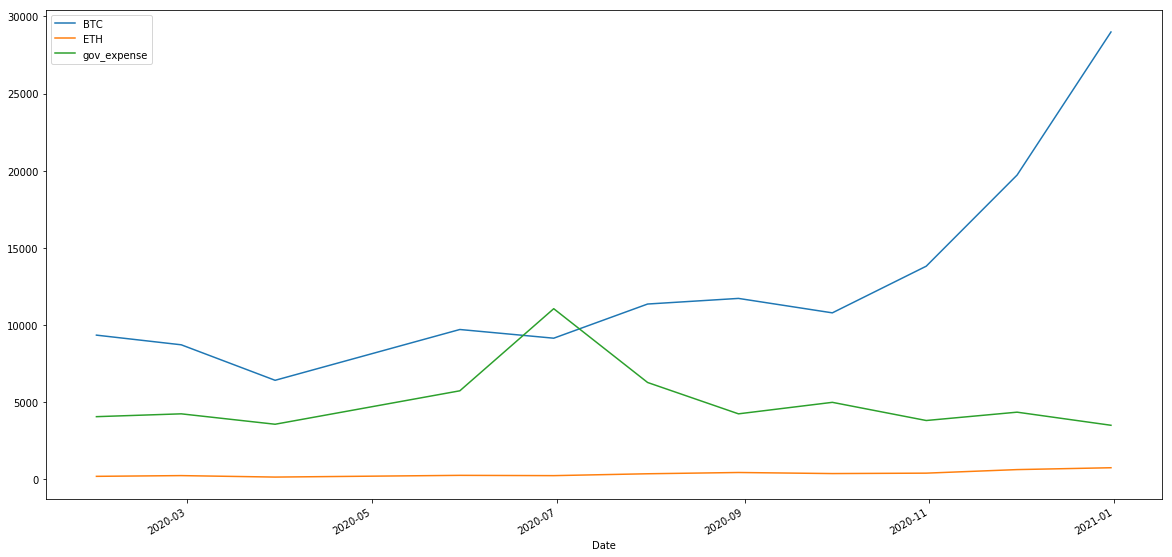

In [36]:
merged_data.plot(figsize=(20,10)) 

In [33]:
price_correlation = merged_data.corr()
price_correlation

,BTC,ETH,gov_expense
BTC,1.000000,0.948553,-0.286698
ETH,0.948553,1.000000,-0.280364
gov_expense,-0.286698,-0.280364,1.000000


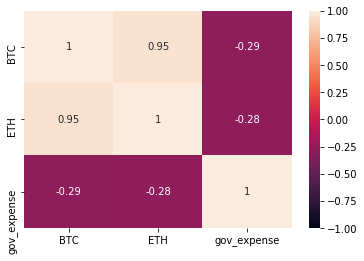

In [35]:
sns.heatmap(price_correlation, vmin=-1, vmax=1, annot=True) 